In this notebook, we will analyze the Suicide Rates dataset and draw conclusions related to global suicide trends from 1985 to 2016.

In [42]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

Let's take a look at our dataset.

# Data preprocessing

In [43]:
df = pd.read_csv('dataset.csv')
df.sample(7)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
20365,Republic of Korea,1996,female,75+ years,150,616700,24.32,Republic of Korea1996,NaN,"598,099,073,901",14071,G.I. Generation
8569,Estonia,2012,female,5-14 years,0,63330,0.00,Estonia2012,0.855,"23,043,864,510",18411,Generation Z
10433,Grenada,1990,female,25-34 years,0,4900,0.00,Grenada1990,NaN,"278,098,778",3391,Boomers
17827,Nicaragua,2012,female,35-54 years,12,634573,1.89,Nicaragua2012,0.625,"10,532,001,130",2006,Generation X
25504,Trinidad and Tobago,2001,male,75+ years,7,12351,56.68,Trinidad and Tobago2001,NaN,"8,824,873,259",7458,Silent
27286,Uruguay,1990,female,55-74 years,25,283000,8.83,Uruguay1990,0.692,"9,298,839,655",3281,G.I. Generation
22822,Slovakia,1996,male,35-54 years,242,723992,33.43,Slovakia1996,NaN,"27,821,913,815",5529,Boomers


It is evident that our data consists of twelve independent variables which are:

- country
- year
- sex
- age
- suicides_no: number of suicides
- population
- suicides/100k pop: number of suicides per 100k population
- country-year
- HDI for year: human development index (composite measure of societal development)
- gdp_for_year: annual country GDP in dollars
- gdp_per_capita: average GDP per person in dollars 
- generation: ['Generation X', 'Silent', 'Millenials', 'Boomers', 'G.I. Generation', 'Generation Z']

Let's adjust them to our analysis.

The 'country-year' column seems unnecessary since it duplicates information already present in the separate 'country' and 'year' columns.

In [44]:
column_name_mapping = {
    'suicides/100k pop': 'suicides_per_100k',
    'HDI for year': 'HDI_for_year',
    ' gdp_for_year ($) ': 'gdp_for_year',
    'gdp_per_capita ($)': 'gdp_per_capita'
}

df.rename(columns=column_name_mapping, inplace=True)
df.drop('country-year', axis=1, inplace=True)

Let's check the number of NaN values present in each column.

In [45]:
def check_missing_values(column):
    nan_percentage = df[column].isnull().sum() / df[column].size
    print(f'"{column}" column consists of {nan_percentage:.2%} missing values.')

for column in df.columns:
    check_missing_values(column)

"country" column consists of 0.00% missing values.
"year" column consists of 0.00% missing values.
"sex" column consists of 0.00% missing values.
"age" column consists of 0.00% missing values.
"suicides_no" column consists of 0.00% missing values.
"population" column consists of 0.00% missing values.
"suicides_per_100k" column consists of 0.00% missing values.
"HDI_for_year" column consists of 69.94% missing values.
"gdp_for_year" column consists of 0.00% missing values.
"gdp_per_capita" column consists of 0.00% missing values.
"generation" column consists of 0.00% missing values.


The 'HDI_for_year' column seems to have many NaN values. 

It's not a good idea to think about 'HDI_for_year' too much. Using the mean to fill in missing values could mess up the data. 
For example: really poor countries with very low HDI would be pushed up to the mean, creating inaccurate information.

Let's leave out this column for now and come back to it later.

In [46]:
df.drop('HDI_for_year', axis=1, inplace=True)
df.sample(7)

,country,year,sex,age,suicides_no,population,suicides_per_100k,gdp_for_year,gdp_per_capita,generation
2305,Azerbaijan,2001,male,25-34 years,40,603150,6.63,"5,707,720,391",759,Generation X
18573,Paraguay,1985,female,35-54 years,3,278563,1.08,"2,966,234,106",964,Silent
10258,Greece,2004,female,75+ years,3,451960,0.66,"240,521,260,988",22804,Silent
6551,Croatia,2010,female,75+ years,46,221668,20.75,"59,829,574,391",14232,Silent
227,Albania,2007,female,5-14 years,0,256808,0.00,"10,701,011,897",3863,Generation Z
7661,Denmark,2014,female,75+ years,36,248889,14.46,"352,993,633,221",66114,Silent
13024,Italy,2004,female,25-34 years,107,4225557,2.53,"1,798,314,750,435",32704,Generation X


We're all set for analysis with our data.

## Global Annual Suicides

Let's begin our analysis by visualizing the frequency of suicides committed over the years.

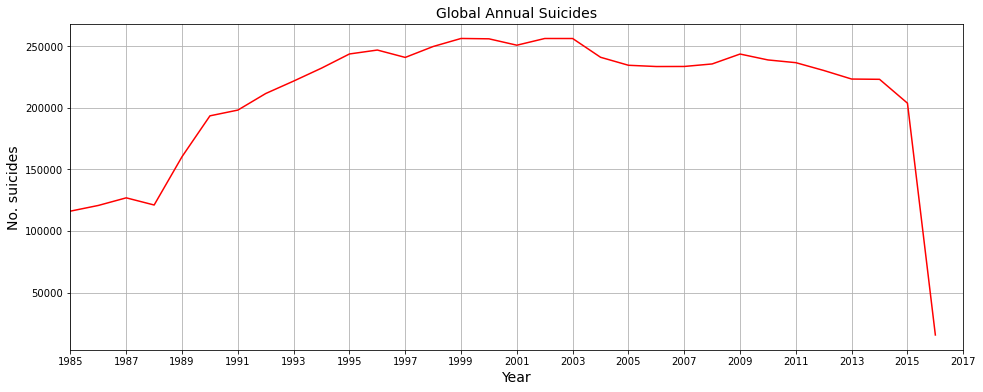

In [47]:
suicides_per_year = df.groupby('year')['suicides_no'].sum()

plt.figure(figsize=(16, 6)) 

plt.plot(suicides_per_year.index, suicides_per_year.values, color='red')

plt.xlabel('Year', fontsize=14)
plt.ylabel('No. suicides', fontsize=14)
plt.title('Global Annual Suicides', fontsize=14)

plt.grid()

plt.xlim(min(suicides_per_year.keys()), max(suicides_per_year.keys()))

plt.xticks(range(min(suicides_per_year.index), max(suicides_per_year.index)+3, 2))

plt.show()

Looking at the given data, we can notice a few important things:
    
- There is an increasing trend in the number of suicides from 1985 to around 2000.
    
- It appears that the pattern starts to vary with occasional increases and decreases, yet the values mostly stay within a consistent range. 

- There is an extremely low value for the year 2016, which is about 13 times lower than that of 2015. This could possibly mean there's an *outlier*, or it might indicate a powerful impact from our anti-suicidal strategy.

## Suicides by Gender

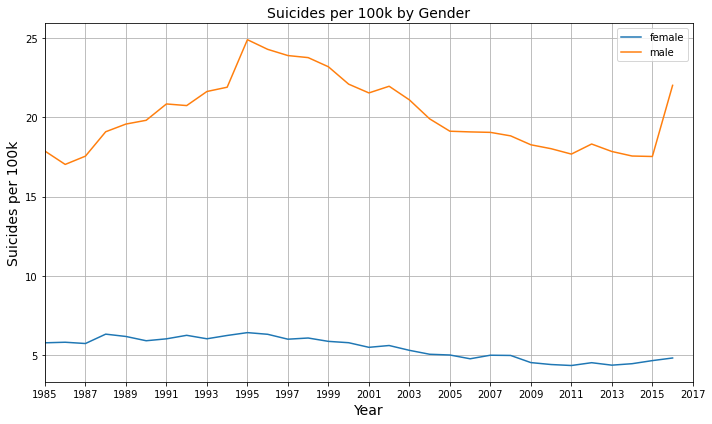

In [48]:
gender_df = df.pivot_table(index='sex', columns='year', values='suicides_per_100k', aggfunc='mean')

plt.figure(figsize=(10, 6))

for gender in gender_df.index:
    plt.plot(gender_df.columns, gender_df.loc[gender], label=gender)

plt.title('Suicides per 100k by Gender', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicides per 100k', fontsize = 14)

plt.legend()
plt.grid()

plt.xlim(min(suicides_per_year.keys()), max(suicides_per_year.keys()))

plt.xticks(range(min(suicides_per_year.index), max(suicides_per_year.index)+3, 2))

plt.tight_layout()

plt.show()

It's clear that males are about four times more likely to commit suicide than females. 

The highest point for suicides in both genders was in 1995, followed by a decline. However, there's a worrying sign that the rates might be starting to increase again.

## Suicides by Age

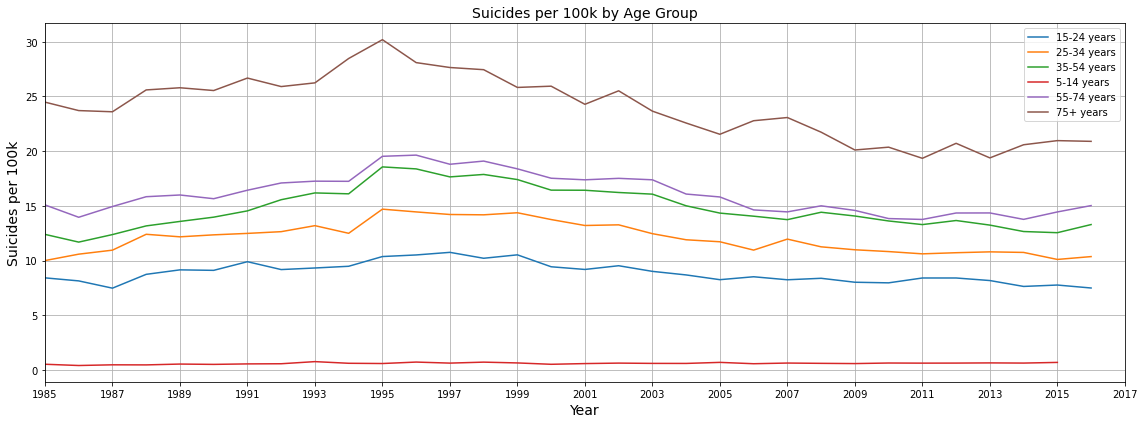

In [49]:
age_df = df.pivot_table(index='age', columns='year', values='suicides_per_100k', aggfunc='mean')

plt.figure(figsize=(16, 6))

for age_group in age_df.index:
    plt.plot(age_df.columns, age_df.loc[age_group], label=age_group)

plt.title('Suicides per 100k by Age Group', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Suicides per 100k', fontsize = 14)

plt.legend()
plt.grid()

plt.xlim(min(suicides_per_year.keys()), max(suicides_per_year.keys()))

plt.xticks(range(min(suicides_per_year.index), max(suicides_per_year.index)+3, 2))

plt.tight_layout()

plt.show()

Among different age groups, those who are 75 years and older have the highest rate of suicide per 100,000 people. This means that they tend to experience suicide more often than other age groups. 

Fortunately, there seems to be a positive trend showing that overall, the frequency of these tragic events has been decreasing over the years.

# Geospatial Analysis

Let's check out how suicides are spread out among different countries.

In [50]:
country_suicides = df.groupby('country')['suicides_no'].sum().reset_index()

fig = px.choropleth(country_suicides, 
                    locations='country', 
                    locationmode='country names', 
                    color='suicides_no', 
                    title='Suicides by Country',
                    hover_name='country', 
                    color_continuous_scale='Plasma')

fig.show()

In [51]:
sorted_country_suicides = country_suicides.sort_values(by='suicides_no', ascending=False)

sorted_country_suicides.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no
75,Russian Federation,1209742
98,United States,1034013
46,Japan,806902
33,France,329127
95,Ukraine,319950
35,Germany,291262
73,Republic of Korea,261730
15,Brazil,226613
69,Poland,139098
97,United Kingdom,136805


Looking at the map and graph, we can see that:

- Russian Federation and United States have the highest number of suicides, followed by Japan, France, and Ukraine.

- The Republic of Korea, Brazil, Poland, and United Kingdom also have significant numbers of suicides.

- Many other countries, including Italy, Mexico, Thailand, and Canada, have notable suicide numbers as well.

## Income & Suicides

Let's connect our previous rankings to the idea that "wealthier countries tend to have more suicides." 

This prompts the question: Is there a connection between higher GDP per capita and a higher number of suicides?

In [52]:
gpd_and_suicides_df = df.groupby('country')[['gdp_per_capita', 'suicides_per_100k']].sum().reset_index()

sorted_gpd_and_suicides_df = gpd_and_suicides_df.sort_values(by=['suicides_per_100k', 'gdp_per_capita'], ascending=[False, False])

sorted_gpd_and_suicides_df.head(10)

,country,gdp_per_capita,suicides_per_100k
75,Russian Federation,2112096,11305.13
52,Lithuania,2431504,10588.88
40,Hungary,2904716,10156.07
47,Kazakhstan,1662684,9519.52
73,Republic of Korea,5506068,9350.45
6,Austria,13088000,9076.23
95,Ukraine,627492,8931.66
46,Japan,13539888,8025.23
32,Finland,12342960,7924.11
12,Belgium,11928828,7900.50


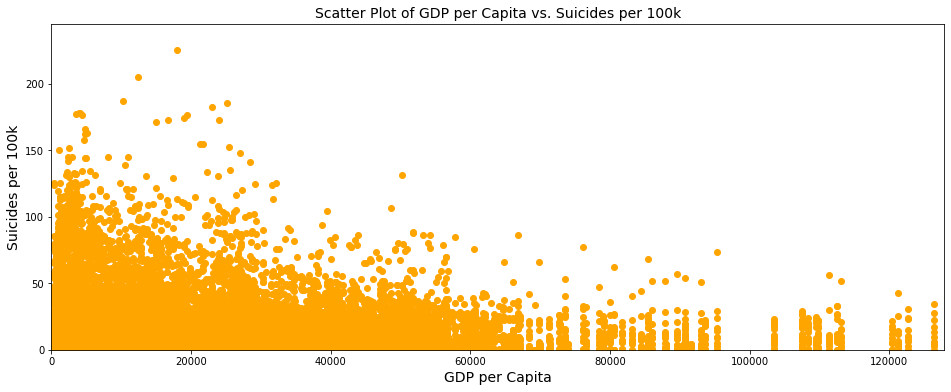

Correlation coefficient: 0.0018


In [53]:
plt.figure(figsize=(16, 6))

plt.scatter(df["gdp_per_capita"], df["suicides_per_100k"], color="orange")

plt.title("Scatter Plot of GDP per Capita vs. Suicides per 100k", fontsize=14)
plt.xlabel("GDP per Capita", fontsize=14)
plt.ylabel("Suicides per 100k", fontsize=14)

plt.xlim(0, df["gdp_per_capita"].max()+1500)
plt.ylim(0, df["suicides_per_100k"].max()+20)

plt.show()

print("Correlation coefficient: {:.2}".format(np.corrcoef(df["gdp_per_capita"], df["suicides_per_100k"])[0, 1]))

A correlation coefficient of 0.0018 means there's a hardly noticeable straight-line link between GDP per Capita and Suicider per 100k. Changes in one variable don't really go along with changes in the other variable.

## HDI & Suicides

Wrapping up, let's return to the 'HDI_for_year' as I mentioned earlier in this notebook.

Well, it's time to look into this column, but we'll only consider the values that make sense - no need to worry about the missing ones.

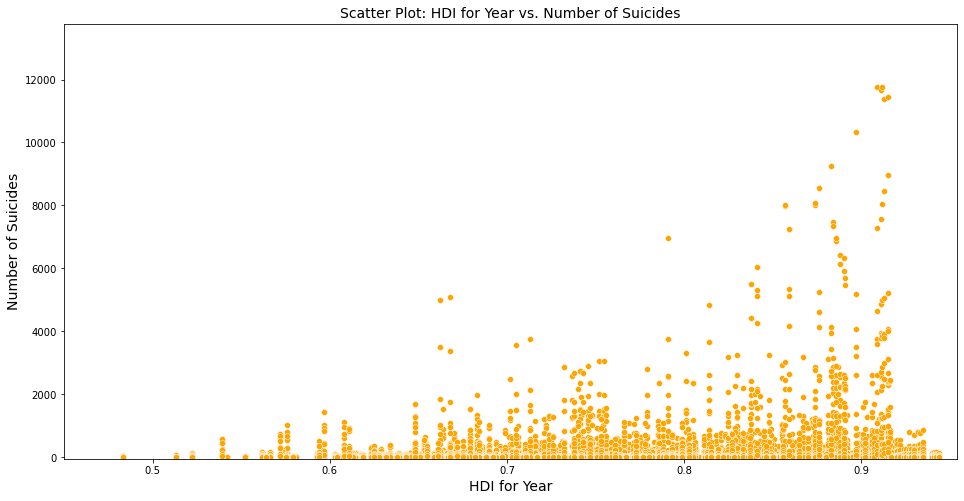

In [54]:
full_df = pd.read_csv('dataset.csv')
filtered_df = full_df.dropna(subset=['HDI for year'], inplace=True)

f, ax = plt.subplots(1, 1, figsize=(16, 8))
ax = sns.scatterplot(x="HDI for year", y="suicides_no", data=full_df, color='orange')

ax.set_xlabel("HDI for Year", fontsize=14)
ax.set_ylabel("Number of Suicides", fontsize=14)
ax.set_title("Scatter Plot: HDI for Year vs. Number of Suicides", fontsize=14)

ax.set_xlim(0.45, full_df['HDI for year'].max()+0.01)
ax.set_ylim(-50, full_df['suicides_no'].max()+2000) 

plt.show()

It looks like when the Human Development Index (HDI) goes up each year, more people decide to end their lives.

HDI counts things like money differences, changes in society, mental health support, school stress, and feeling alone in busy places. This teaches us that helping mental well-being as societies develop is complex and needs careful attention.

# Conclusions

- Suicide rates have gone up and down, but overall they seem to be getting better, possibly because of strategies to help prevent suicide.

- More males than females are taking their own lives, so we need to find ways to help males with their mental health.

- Older people, like those who are 75 and up, are having more trouble and need special help and support.

- When countries become better in different ways, like having more money and better schools, it doesn't always mean fewer suicides. It's complicated, involving things like how people feel, mental health support, and changes in society.